## Figure 1

In [1]:
import numpy as np
import json
import itertools
from scipy.stats import poisson, binom, binned_statistic

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import Normalize

#### Load pre-generated network instances and calculate statistics

Download data from here:<br>
https://figshare.com/articles/dataset/Random_linear_physical_network_instances/24083532

Or generate your own networks using the `generate_randLPNs.ipynb` notebook.

In [2]:
N=300
M_num = 100
alphas=[.4,2.,1.,.5,.35]
indep = 1000
sampMs = np.unique(np.logspace(0,np.log10(N**2/2),M_num+1,dtype=np.int))
print(sampMs)


MMAX  = {}
MPHYS = {}
CL  = {}
CLstd = {}

for alpha in alphas:
    with open("saved_nets/randLPN_linklink_N%dalpha%.3findep%d.json"%(N,alpha,indep),'rt') as f:
        json_dict = json.load(f)
    
    Ms    = np.zeros((indep,N*(N-1)//2))
    Mmaxs = np.zeros(indep)
    Mphyss= np.zeros(indep)
    cls = np.empty((indep,N*(N-1)//2))
    cls[:] = np.NaN
    
    for i in range(indep):
        pts = json_dict['physnets'][i]['points']
        vws = json_dict['physnets'][i]['links']
        ts  = json_dict['physnets'][i]['time_added']
        ts = np.array(ts)+1
        
        pts = np.array(pts)
        ls = np.array([np.linalg.norm(pts[v]-pts[w]) for v,w in vws])
        cls[i, :len(ls)] = ls.cumsum()/np.arange(1,len(ls)+1)

        Mmaxs[i] = len(vws)
        Mphyss[i]= len(ts)-(np.array(ts)<1.1*np.arange(1,len(ts)+1))[::-1].argmax()

    CL[alpha]    = np.nanmean(cls,axis=0)
    CLstd[alpha] = np.nanstd(cls,axis=0)
    MMAX[alpha]  = Mmaxs
    MPHYS[alpha] = Mphyss

[    1     2     3     4     5     6     7     8     9    10    11    13
    14    16    18    20    22    24    27    30    34    38    42    47
    52    58    65    72    80    90   100   111   124   138   153   171
   190   212   236   262   292   325   362   403   449   499   556   619
   689   767   854   950  1058  1177  1311  1459  1624  1808  2012  2240
  2493  2775  3089  3439  3828  4260  4742  5279  5876  6540  7280  8103
  9020 10040 11176 12440 13847 15413 17156 19096 21256 23660 26336 29314
 32629 36320 40427 45000]


/home/posfaim/anaconda3/envs/physnet/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice
/home/posfaim/anaconda3/envs/physnet/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [3]:
MPHYS_BINS = {}
alphas = [2.,1.,.5,.35]

MPHYS_BINS[alphas[0]] = np.logspace(np.log10(min(MPHYS[alphas[0]])),np.log10(max(MPHYS[alphas[0]])),10)
MPHYS_BINS[1.] = np.logspace(np.log10(min(MPHYS[1.])),np.log10(max(MPHYS[1.])),20)

MPHYS_BINS[0.35]= np.arange(min(MPHYS[0.35]),max(MPHYS[0.35])+1)
MPHYS_BINS[0.5]=  np.arange(min(MPHYS[0.5]),max(MPHYS[0.5])+1)

In [4]:
M_num = 30
sampMs = np.unique(np.logspace(0,np.log10(N*(N-1)//2),M_num+1,dtype=np.int))

In [5]:
norm = Normalize(vmin=1/3, vmax=2.)
cmap = matplotlib.cm.ScalarMappable(norm=norm, cmap='rainbow')

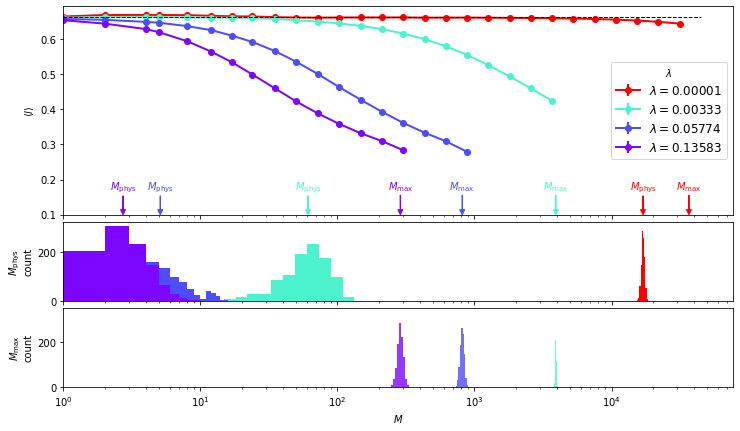

In [6]:
alphas = [2.,1.,.5,.35]

fig = plt.figure(figsize=(12,7.))#,constrained_layout=True)
gs = plt.GridSpec(9, 1, figure=fig)
plt.tight_layout()

ax1 = fig.add_subplot(gs[:5,:])
ax3 =fig.add_subplot(gs[5:7,:],sharex=ax1)
ax2 = fig.add_subplot(gs[7:,:],sharex=ax1)
axs=[ax1,ax2,ax3]

lw=2
lw2=1.


plt.sca(axs[0])

prop_cycle = plt.rcParams['axes.prop_cycle']
colors     = itertools.cycle(prop_cycle.by_key()['color'])

for i,alpha in enumerate(alphas):
    c=cmap.to_rgba(alpha)
    plt.errorbar(sampMs,CL[alpha][sampMs],yerr=CLstd[alpha][sampMs]/np.sqrt(indep),fmt='o-',color=c,
                 label='$\lambda=%.5f$'%N**-alpha,linewidth=lw)
    
    axs[0].annotate(r'$M_\mathrm{max}$', xy=(np.mean(MMAX[alpha]), 0.1),  xycoords='data',
                xytext=(np.mean(MMAX[alpha]), 0.2), color=c,
                arrowprops=dict(color=c,headwidth=5.,headlength=5.,width=.5),
                horizontalalignment='center', verticalalignment='top')
    
    axs[0].annotate(r'$M_\mathrm{phys}$', xy=(np.mean(MPHYS[alpha]), 0.1),  xycoords='data',
                xytext=(np.mean(MPHYS[alpha]), 0.2), color=c,
                arrowprops=dict(color=c,headwidth=5.,headlength=5.,width=.5),
                horizontalalignment='center', verticalalignment='top')
    

plt.ylim(bottom=0.1)
plt.plot([1,N*N/2],[0.662,0.662],'k--',zorder=11,linewidth=lw2)


plt.xscale('log')
plt.xlim(left=1)
plt.legend(fontsize=12,title=r'$\lambda$',loc='center right')
plt.ylabel(r'$\langle l\rangle$');


plt.sca(axs[1])

plt.xscale('log')

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = itertools.cycle(prop_cycle.by_key()['color'])

for i,alpha in enumerate(alphas):
    c=cmap.to_rgba(alpha)
    if i==0:
        bins_mmax=np.logspace(np.log10(min(MMAX[alpha])),np.log10(max(MMAX[alpha])),4)
        rwidth=2.
    else:
        bins_mmax=np.logspace(np.log10(min(MMAX[alpha])),np.log10(max(MMAX[alpha])),10)
        rwidth=1
    plt.hist(MMAX[alpha],color=c,alpha=.8,bins=bins_mmax,density=False,rwidth=rwidth)
 
    
plt.ylabel('$M_\mathrm{max}$\ncount')
plt.xlabel(r'$M$')

plt.ylim(top=350)


plt.sca(axs[2])

plt.xscale('log')
plt.yscale('linear')


prop_cycle = plt.rcParams['axes.prop_cycle']
colors = itertools.cycle(prop_cycle.by_key()['color'])

for i,alpha in enumerate(alphas):
    c=cmap.to_rgba(alpha)
    rwidth=1.
    plt.hist(MPHYS[alpha],color=c,bins=MPHYS_BINS[alpha],density=False,rwidth=rwidth)
    
plt.ylabel('$M_\mathrm{phys}$\ncount')


plt.setp(axs[2].get_xticklabels(), visible=False)
plt.setp(axs[0].get_xticklabels(), visible=False);